In [ ]:
#This notebook is the subset of main file data and code but refer the main data and code other than taking demo data

In [23]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [24]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [26]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [27]:
articles = []
labels = []

with open("demo.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

15
15


In [28]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

12
12
12
3
3


In [29]:
#Capturing unique word index
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'v': 2,
 'mr': 3,
 'said': 4,
 'film': 5,
 'us': 6,
 'tv': 7,
 'howard': 8,
 'one': 9,
 'year': 10,
 'would': 11,
 'election': 12,
 'virgin': 13,
 'blue': 14,
 'people': 15,
 'told': 16,
 'worldcom': 17,
 'league': 18,
 'want': 19,
 'also': 20,
 'ebbers': 21,
 'back': 22,
 'number': 23,
 'labour': 24,
 'party': 25,
 'scholl': 26,
 'much': 27,
 'take': 28,
 'today': 29,
 'bbc': 30,
 'make': 31,
 'going': 32,
 'cup': 33,
 'third': 34,
 '4': 35,
 'blair': 36,
 'henman': 37,
 'final': 38,
 'watch': 39,
 'five': 40,
 'years': 41,
 'show': 42,
 'like': 43,
 'uk': 44,
 'play': 45,
 'programme': 46,
 'end': 47,
 'bill': 48,
 'accounting': 49,
 'myers': 50,
 'claim': 51,
 'shares': 52,
 'farrell': 53,
 'face': 54,
 'newcastle': 55,
 'drawn': 56,
 'ocean': 57,
 'sequel': 58,
 'took': 59,
 'star': 60,
 'michael': 61,
 'anti': 62,
 'government': 63,
 'get': 64,
 'day': 65,
 '5': 66,
 'may': 67,
 'parliament': 68,
 'home': 69,
 'high': 70,
 'definition': 71,
 'new': 72,
 'content': 73

In [30]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[0])#matching index and words for each sentence

[7, 221, 222, 112, 69, 223, 457, 458, 70, 71, 224, 225, 226, 227, 459, 460, 461, 113, 15, 39, 7, 462, 463, 40, 41, 228, 229, 464, 230, 465, 466, 231, 467, 42, 468, 469, 470, 72, 114, 471, 9, 472, 473, 6, 474, 232, 115, 73, 475, 112, 476, 69, 116, 233, 117, 118, 119, 234, 477, 478, 479, 480, 481, 235, 9, 482, 483, 114, 236, 225, 237, 226, 227, 74, 484, 75, 120, 238, 43, 6, 121, 44, 239, 485, 486, 15, 240, 487, 45, 241, 76, 242, 7, 115, 19, 488, 243, 489, 27, 490, 7, 20, 244, 491, 70, 71, 7, 122, 123, 245, 492, 6, 493, 28, 124, 494, 70, 71, 495, 15, 76, 242, 496, 20, 497, 498, 246, 125, 247, 248, 499, 500, 501, 502, 503, 6, 116, 233, 117, 119, 504, 77, 126, 249, 505, 506, 127, 507, 508, 250, 251, 509, 6, 510, 243, 128, 20, 511, 512, 124, 513, 514, 515, 516, 43, 239, 517, 29, 518, 519, 78, 41, 228, 44, 520, 521, 30, 522, 523, 16, 30, 524, 525, 526, 30, 527, 129, 249, 528, 529, 530, 531, 128, 532, 44, 533, 127, 250, 534, 130, 535, 73, 131, 536, 246, 131, 4, 252, 132, 127, 537, 133, 538, 53

In [31]:
#By using padding information will be mot losted but by using a truncation information will be losted
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [32]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In [33]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

3
(3, 200)


In [34]:
print(set(labels))

{'tech', 'entertainment', 'politics', 'sport', 'business'}


In [35]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [44]:
validation_label_seq

array([[2],
       [4],
       [1]])

In [36]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin cheers anti nazi film german movie anti nazi resistance heroine drawn loud applause berlin film festival sophie scholl final days portrays final days member white rose movement scholl 21 arrested beheaded brother hans 1943 distributing leaflets condemning abhorrent tyranny adolf hitler director marc rothemund said feeling responsibility keep legacy scholls going must somehow keep ideas alive added film drew transcripts gestapo interrogations scholl trial preserved archive communist east germany secret police discovery inspiration behind film rothemund worked closely surviving relatives including one scholl sisters ensure historical accuracy film scholl members white rose resistance group first started distributing anti nazi leaflets summer 1942 arrested dropped leaflets munich university calling day reckoning adolf hitler regime film focuses six days scholl arrest intense trial saw scholl initially deny charges ended defiant appearance one three german films vying top prize fest

In [37]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs,validation_data=(validation_padded, validation_label_seq))

Epoch 1/10
1/1 [==============================] - 0s 445ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.5933 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 0s 349ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.6056 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 333ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.6179 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 345ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.6300 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 367ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.6422 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 348ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.6542 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 0s 331ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.6663 - val_accuracy: 0.6667
Epoch 8/10
1/1 [====

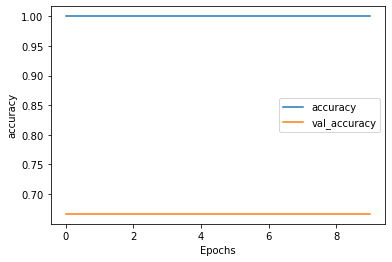

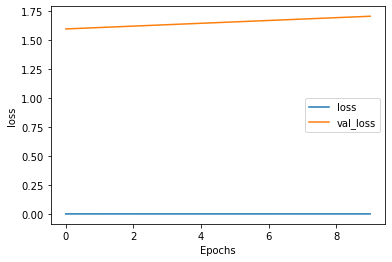

In [48]:
from matplotlib import pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")